# Import Dependencies

In [ ]:
import math
from numpy import sort
import pandas as pd
import pickle
import time
import random
from scipy import stats 

import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn as sns
sns.set(style='white', palette = 'Paired')
#plt.style.use('ggplot')
%matplotlib inline
%config InlineBackend.figure_formats = ['svg']
np.set_printoptions(suppress=True) # Suppress scientific notation where possible
from ipywidgets import interactive, FloatSlider

from sklearn.inspection import permutation_importance
from sklearn import linear_model, svm, naive_bayes, neighbors, ensemble
from sklearn.model_selection import KFold, train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, plot_confusion_matrix, confusion_matrix,\
roc_auc_score, roc_curve, precision_recall_curve, f1_score, fbeta_score, recall_score,\
precision_recall_fscore_support
from sklearn.feature_selection import SelectFromModel

from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.metrics import accuracy_score, make_scorer, log_loss

from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
import imblearn

from collections import Counter
from mlxtend.plotting import plot_decision_regions

import xgboost as xgb
from xgboost import XGBRegressor

import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.feature_selection import f_regression, RFE, RFECV

from sklearn.preprocessing import OneHotEncoder

# EDA

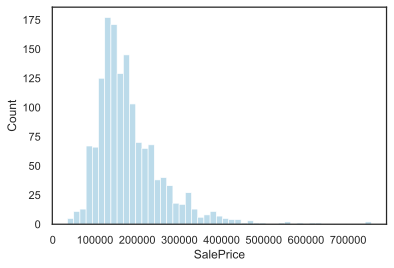

In [191]:
# Distribution of SalePrice
sns.histplot(df['SalePrice']);

In [83]:
df = pd.read_csv('./data/train.csv')

In [4]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [13]:
df.shape

(1460, 80)

In [84]:
# Drop Id column

df.drop(columns='Id', inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [9]:
df.select_dtypes(include='number')

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,62.0,7917,6,5,1999,2000,0.0,0,0,...,0,40,0,0,0,0,0,8,2007,175000
1456,20,85.0,13175,6,6,1978,1988,119.0,790,163,...,349,0,0,0,0,0,0,2,2010,210000
1457,70,66.0,9042,7,9,1941,2006,0.0,275,0,...,0,60,0,0,0,0,2500,5,2010,266500
1458,20,68.0,9717,5,6,1950,1996,0.0,49,1029,...,366,0,112,0,0,0,0,4,2010,142125


In [11]:
df.select_dtypes(include='object')

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1456,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,...,Attchd,Unf,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal
1457,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,...,Attchd,RFn,TA,TA,Y,NaN,GdPrv,Shed,WD,Normal
1458,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Normal


## Dealing with NaN/missing values

In [85]:
# Alley, PoolQC and MiscFeature have very little values in their column, so let;s go ahead and remove those columns

df.drop(columns=['Alley', 'PoolQC', 'MiscFeature'], inplace=True)

In [66]:
df.isna().sum().index

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF'

In [98]:
df.shape

(1460, 77)

In [71]:
df[df.isna().any(axis=1)]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1453,20,RL,90.0,17217,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,NaN,0,7,2006,WD,Abnorml,84500
1454,20,FV,62.0,7500,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,NaN,0,10,2009,WD,Normal,185000
1455,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,NaN,0,8,2007,WD,Normal,175000
1458,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,NaN,0,4,2010,WD,Normal,142125


In [25]:
# Every single row has at least 1 NaN value

In [95]:
# Let's fill in the NaNs with the mean for numerical columns

df.fillna(value=df.mean(), inplace=True)

In [118]:
df.isna().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 77, dtype: int64

In [111]:
df.select_dtypes(include='object')

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,Fence,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,Typ,Gd,Attchd,RFn,TA,TA,Y,MnPrv,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,Typ,Gd,Detchd,Unf,TA,TA,Y,NaN,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,...,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,WD,Normal
1456,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,...,Min1,TA,Attchd,Unf,TA,TA,Y,MnPrv,WD,Normal
1457,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,...,Typ,Gd,Attchd,RFn,TA,TA,Y,GdPrv,WD,Normal
1458,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,...,Typ,NaN,Attchd,Unf,TA,TA,Y,NaN,WD,Normal


In [ ]:
# Establish catericals and numericals and put column names in 2 lists

categoricals = list(df.select_dtypes(include='object').columns)
numericals = list(df.select_dtypes(include='number').columns)

In [131]:
# Let's replace categorical values with random values from the columns

# Creates a random permutation of the categorical calues
permutation = np.random.permutation(df['MSZoning'])

# Erase the empty values
is_empty = np.where(permutation == "")
permutation = np.delete(permutation, is_empty)

# Replace all empty values of the dataframe
end = len(permutation)
df['MSZoning'] = df['MSZoning'].apply(lambda x: permutation[np.random.randint(end)] if pd.isnull(x) else x)

In [149]:
for column in list(df[categoricals].columns):
    # Creates a random permutation of the categorical calues
    permutation = np.random.permutation(df[column])

    # Erase the empty values
    is_empty = np.where(permutation == "")
    permutation = np.delete(permutation, is_empty)

    # Replace all empty values of the dataframe
    end = len(permutation)
    df[column] = df[column].apply(lambda x: permutation[np.random.randint(end)] if pd.isnull(x) else x)

In [152]:
# Encode categorical columns

def encode_cats(df, categoricals, numericals):
    """
    Takes in a list of categorical columns and a list of numerical columns and returns the dataframe with encoded variables
    """
    ohe = OneHotEncoder(sparse=False, drop='first')
    cat_matrix = ohe.fit_transform(df.loc[:, categoricals])
    X_ohe = pd.DataFrame(cat_matrix,
                         columns=ohe.get_feature_names(categoricals), #create meaningful column names
                         index=df.index) #keep the same index values
    
    return pd.concat([df.loc[:, numericals], X_ohe], axis=1)

In [154]:
df = encode_cats(df, categoricals, numericals)

In [155]:
df['SalePrice']

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In [157]:
df.isna().sum().sum()

0

# Base Model

In [161]:
# Establish features and target

X = df.drop(columns='SalePrice')

y = df['SalePrice']

In [168]:
def test_train_split(X, y):
    """
    Takes the feature and target data and returns the test_train splits.
    Then, X and y and converted to np.array so it can be used in kf function below
    """

    # hold out 20% of the data for final testing
    X, X_test, y, y_test = train_test_split(X, y, test_size=.2, random_state=42)

    # this helps with the way kf will generate indices below
    X, y = np.array(X), np.array(y)

    return X, X_test, y, y_test

In [165]:
def scale_X_test(X_test):
    """
    Takes in a dataframe of X_test features and scales them
    """

    # Scale features and test data

    scaler = StandardScaler()
    X_test_scaled = scaler.fit_transform(X_test)

    return X_test_scaled

In [180]:
def regression_analysis(X, X_test, y, y_test):
        """
        Conducts regression anlaysls. Prints R-squared and MAE for each algorithm
        """
        kf = KFold(n_splits=5, shuffle=True, random_state = 42)
        lr_scores, lr_ridge_scores, lr_lasso_scores, \
        lr_elastic_scores, lr_xgb_scores = [], [], [], [], [] #collect the validation results for all models

        for train_ind, val_ind in kf.split(X,y):

            X_train, y_train = X[train_ind], y[train_ind]
            X_val, y_val = X[val_ind], y[val_ind] 

            # scale features
            scaler = StandardScaler()
            X_train_scaled = scaler.fit_transform(X_train)
            X_val_scaled = scaler.transform(X_val)

            # load models
            lr = LinearRegression()
            lr_ridge = RidgeCV(cv=5)
            lr_lasso = LassoCV(cv=5, tol=0.5, max_iter=50000)
            lr_elastic = ElasticNetCV(cv=5, random_state=42, tol=0.5, max_iter=50000)
            lr_xgb = XGBRegressor()

            # fit models
            lr.fit(X_train_scaled, y_train)
            lr_ridge.fit(X_train_scaled, y_train)
            lr_lasso.fit(X_train_scaled, y_train)
            lr_elastic.fit(X_train_scaled, y_train)
            lr_xgb.fit(X_train_scaled, y_train)

            # create lists of scores
            lr_scores.append(lr.score(X_val_scaled, y_val))
            lr_ridge_scores.append(lr_ridge.score(X_val_scaled, y_val))
            lr_lasso_scores.append(lr_lasso.score(X_val_scaled, y_val))
            lr_elastic_scores.append(lr_elastic.score(X_val_scaled, y_val))
            lr_xgb_scores.append(lr_xgb.score(X_val_scaled, y_val))

        # Test
        
        # Prints all of our metrics
        
        print(f'Linear Regression val R^2: {np.mean(lr_scores):.3f} +- {np.std(lr_scores):.3f}')
        print(f'Linear Regression test R^2: {lr.score(X_test_scaled, y_test):.3f}')
        print(f'MAE: {mean_squared_error(y_test, lr.predict(X_test_scaled), squared=False):.3f}\n')
        
        print(f'Ridge Regression val R^2: {np.mean(lr_ridge_scores):.3f} +- {np.std(lr_ridge_scores):.3f}')
        print(f'Ridge Regression test R^2: {lr_ridge.score(X_test_scaled, y_test):.3f}')
        print(f'MAE: {mean_squared_error(y_test, lr_ridge.predict(X_test_scaled), squared=False):.3f}\n')

        print(f'Lasso Regression val R^2: {np.mean(lr_lasso_scores):.3f} +- {np.std(lr_lasso_scores):.3f}')
        print(f'Lasso Regression test R^2: {lr_lasso.score(X_test_scaled, y_test):.3f}')
        print(f'MAE: {mean_squared_error(y_test, lr_lasso.predict(X_test_scaled), squared=False):.3f}\n')

        print(f'Elastic Net Regression val R^2: {np.mean(lr_elastic_scores):.3f} +- {np.std(lr_elastic_scores):.3f}')
        print(f'Elastic Net Regression test R^2: {lr_elastic.score(X_test_scaled, y_test):.3f}')
        print(f'MAE: {mean_squared_error(y_test, lr_elastic.predict(X_test_scaled), squared=False):.3f}\n')

        print(f'XGBoost Regression val R^2: {np.mean(lr_xgb_scores):.3f} +- {np.std(lr_xgb_scores):.3f}')
        print(f'XGBoost Regression test R^2: {lr_xgb.score(X_test_scaled, y_test):.3f}')
        print(f'MAE: {mean_squared_error(y_test, lr_xgb.predict(X_test_scaled), squared=False):.3f}')
        
        # Put models and respective scores in a list
        
        model_score_list = [[lr, lr.score(X_test_scaled, y_test)],
                   [lr_ridge, lr_ridge.score(X_test_scaled, y_test)],
                   [lr_lasso, lr_lasso.score(X_test_scaled, y_test)],
                   [lr_elastic, lr_elastic.score(X_test_scaled, y_test)],
                   [lr_xgb, lr_xgb.score(X_test_scaled, y_test)]]
        
        model_score_list = sorted(model_score_list, key = lambda x: x[1])
        
        # Return model with highest R-squared
        
        return model_score_list[-1][0]

In [184]:
X, X_test, y, y_test = test_train_split(X, y)

In [185]:
X_test_scaled = scale_X_test(X_test)

In [189]:
model  = regression_analysis(X, X_test, y, y_test)

Linear Regression val R^2: -26283068809823255527424.000 +- 45650863285650386321408.000
Linear Regression test R^2: -1160904098968898764800.000
MAE: 2192903364461607.750

Ridge Regression val R^2: 0.680 +- 0.247
Ridge Regression test R^2: 0.840
MAE: 25716.656

Lasso Regression val R^2: 0.630 +- 0.310
Lasso Regression test R^2: 0.790
MAE: 29518.520

Elastic Net Regression val R^2: 0.244 +- 0.019
Elastic Net Regression test R^2: 0.285
MAE: 54436.976

XGBoost Regression val R^2: 0.856 +- 0.058
XGBoost Regression test R^2: 0.855
MAE: 24528.532


In [187]:
def plot_residuals(model):
    """
    Residuals v Predicted plot
    """

    residuals = y_test - model.predict(X_test_scaled)

    plt.figure(figsize=(10, 7))
    plt.scatter(model.predict(X_test_scaled), residuals)   

    plt.axhline(0, linestyle='--', color='gray')
    plt.xlabel('Predicted Values', fontsize=18)
    plt.ylabel('Residuals', fontsize=18);

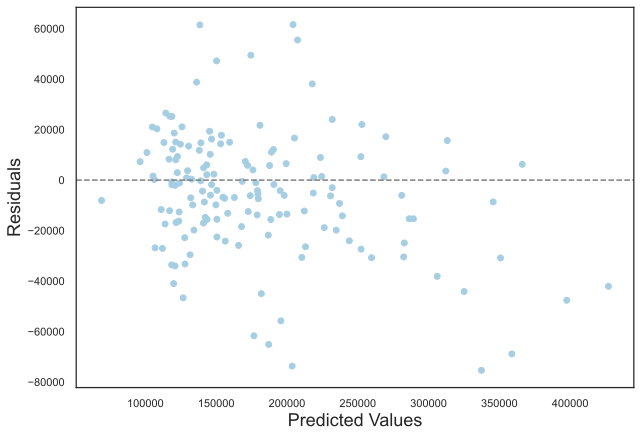

In [190]:
plot_residuals(model)